# Wrangling Final Project

Key Points
Key points to keep in mind when data wrangling for this project:

- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

## Gather

In [871]:
import pandas as pd
import zipfile
import tweepy
import seaborn as sns
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [866]:
#1. import the csv file 
df_twitter_archive= pd.read_csv('twitter-archive-enhanced.csv')

In [868]:
df_twitter_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

image_predictions.tsv is hosted and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [648]:
#2. import the tsv file
import requests
import os

predictions_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(predictions_url, allow_redirects=True)
open('image_predictions.tsv', 'wb').write(response.content)

df_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

https://buildmedia.readthedocs.org/media/pdf/tweepy/latest/tweepy.pdf

https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

In [649]:
#3. fetch data using tweepy
import tweepy


consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_token_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

#api = tweepy.API(auth)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, parser=tweepy.parsers.JSONParser())

In [650]:
# test authentication
try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [651]:
df_tweetids = df_twitter_archive['tweet_id']

In [333]:
import json
import datetime as dt

df_res = []

for tweet_id in df_tweetids:
    try:
        data = api.get_status(tweet_id, tweet_mode='extended')
        with open('text_json.txt', 'w') as outfile:
            json.dump(data, outfile)
            df_res.append(data)
        
    # catch all exceptions
    except Exception as e:
        print('encountered an exception')

encountered an exception
encountered an exception
encountered an exception
encountered an exception
encountered an exception
encountered an exception
encountered an exception
encountered an exception
encountered an exception
encountered an exception
encountered an exception
encountered an exception
encountered an exception
encountered an exception
encountered an exception
encountered an exception
encountered an exception
encountered an exception


Rate limit reached. Sleeping for: 470


encountered an exception
encountered an exception
encountered an exception
encountered an exception
encountered an exception
encountered an exception


Rate limit reached. Sleeping for: 747


encountered an exception


In [652]:
df_tweets = pd.DataFrame(df_res)

## Access 

Detect and document at least eight (8) quality issues and two (2) tidiness issues. To meet specifications, the issues that satisfy the Project Motivation (see the Key Points header on the previous page) must be assessed.

MESSY
missing data
unstructured data
multiple variables in one column
variables stored in the wrong places
observations split incorrectly or left together against normalization rules
switched columns and rows
extra spaces 

DIRTY
duplicate data
outdated data
insecure data
incomplete data
inaccurate/incorrect data
inconsistent data
data hoarding


The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate). 

## Clean [Quality]

#### 1. Define 

'created_at' was in string form so converted it to datetime

#### Code

In [654]:
import datetime as dt

df_tweets['created_at'] = pd.to_datetime(df_tweets['created_at'], format='%a %b %d %X %z %Y')

#### Test

In [655]:
df_tweets.dtypes

created_at                       datetime64[ns, UTC]
id                                             int64
id_str                                        object
full_text                                     object
truncated                                       bool
display_text_range                            object
entities                                      object
extended_entities                             object
source                                        object
in_reply_to_status_id                        float64
in_reply_to_status_id_str                     object
in_reply_to_user_id                          float64
in_reply_to_user_id_str                       object
in_reply_to_screen_name                       object
user                                          object
geo                                           object
coordinates                                   object
place                                         object
contributors                                  

#### 2. Define 

df_tweets['tweet_id'] and df_predictions['id'] need to be renamed to match

#### Code

In [656]:
df_tweets.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [657]:
df_tweets.dtypes

created_at                       datetime64[ns, UTC]
tweet_id                                       int64
id_str                                        object
full_text                                     object
truncated                                       bool
display_text_range                            object
entities                                      object
extended_entities                             object
source                                        object
in_reply_to_status_id                        float64
in_reply_to_status_id_str                     object
in_reply_to_user_id                          float64
in_reply_to_user_id_str                       object
in_reply_to_screen_name                       object
user                                          object
geo                                           object
coordinates                                   object
place                                         object
contributors                                  

#### 3. Define 

'extended_entities' is a Nan, which are tweets with no images, remove rows with no images

#### Code

In [658]:
df_tweets.dropna(subset= ['extended_entities'], inplace=True)

#### Test

In [659]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2059 non-null   datetime64[ns, UTC]
 1   tweet_id                       2059 non-null   int64              
 2   id_str                         2059 non-null   object             
 3   full_text                      2059 non-null   object             
 4   truncated                      2059 non-null   bool               
 5   display_text_range             2059 non-null   object             
 6   entities                       2059 non-null   object             
 7   extended_entities              2059 non-null   object             
 8   source                         2059 non-null   object             
 9   in_reply_to_status_id          23 non-null     float64            
 10  in_reply_to_status_id_st

#### 4. Define 

'retweeted_status' not all tweets are original tweets, there are 163 that are retweets by @rate_dogs

#### Code

In [660]:
df_media = df_tweets.dropna(subset=['retweeted_status'])
df_tweets = df_tweets.drop(df_media.index)

#### Test

In [661]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     1987 non-null   datetime64[ns, UTC]
 1   tweet_id                       1987 non-null   int64              
 2   id_str                         1987 non-null   object             
 3   full_text                      1987 non-null   object             
 4   truncated                      1987 non-null   bool               
 5   display_text_range             1987 non-null   object             
 6   entities                       1987 non-null   object             
 7   extended_entities              1987 non-null   object             
 8   source                         1987 non-null   object             
 9   in_reply_to_status_id          23 non-null     float64            
 10  in_reply_to_status_id_st

#### 5. Define 

'favorite_count' has some value of 0, when we check the posted if usually has more than 0

#### Code

In [662]:
df_tweets = df_tweets[df_tweets.favorite_count != 0]

#### Test

In [663]:
df_tweets.favorite_count.sort_values().unique

<bound method Series.unique of 2314        70
2294        94
2312        94
2326        96
2302        99
         ...  
1055    113051
129     114244
517     118070
397     130406
1015    152938
Name: favorite_count, Length: 1987, dtype: int64>

#### 6. Define 

'in_reply_to*' field possibly indicate non original tweets, remove columns that are non-NaN or empty

#### Code

In [664]:
df_inreplyto = df_tweets.dropna(subset=['in_reply_to_status_id'])
df_tweets = df_tweets.drop(df_inreplyto.index)

#### Test

In [665]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2330
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     1964 non-null   datetime64[ns, UTC]
 1   tweet_id                       1964 non-null   int64              
 2   id_str                         1964 non-null   object             
 3   full_text                      1964 non-null   object             
 4   truncated                      1964 non-null   bool               
 5   display_text_range             1964 non-null   object             
 6   entities                       1964 non-null   object             
 7   extended_entities              1964 non-null   object             
 8   source                         1964 non-null   object             
 9   in_reply_to_status_id          0 non-null      float64            
 10  in_reply_to_status_id_st

#### 7.  Define 

duplicated 'jpg_url' in the df_repdictions data, remove the duplicates

In [666]:
df_predictions.jpg_url.duplicated().sum()

66

#### Code

In [667]:
df_predictions.drop_duplicates(subset="jpg_url", inplace = True)

#### Test

In [668]:
df_predictions.jpg_url.duplicated().sum()

0

#### 8. Define 

there are 137 duplicated for the expanded_urls in twitter archive, remove rows with duplicates

In [669]:
df_twitter_archive.expanded_urls.duplicated().sum()

137

#### Code

In [670]:
df_twitter_archive.drop_duplicates(subset="expanded_urls", inplace = True)

#### Test

In [671]:
df_twitter_archive.expanded_urls.duplicated().sum()

0

## Clean [Tidiness]

#### 1. Define 

merge all three data frames together. note that the dataframe each had a number of different rows so we aer only merge on the tweet_ids

#### Code

In [672]:

from functools import reduce
#df_master = pd.merge(df_tweets, df_predictions, on=['tweet_id'], how='left')
#merge frist two dfs
frames = [df_twitter_archive, df_predictions, df_tweets ]

df_master = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), frames)

#### Test

In [673]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1887
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       1888 non-null   int64              
 1   in_reply_to_status_id_x        0 non-null      float64            
 2   in_reply_to_user_id_x          0 non-null      float64            
 3   timestamp                      1888 non-null   object             
 4   source_x                       1888 non-null   object             
 5   text                           1888 non-null   object             
 6   retweeted_status_id            0 non-null      float64            
 7   retweeted_status_user_id       0 non-null      float64            
 8   retweeted_status_timestamp     0 non-null      object             
 9   expanded_urls                  1888 non-null   object             
 10  rating_numerator        

#### 2. Define 

remove unwanted columns from the newly create df_master dataframe

#### Code

In [676]:
master = df_master[['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
                     'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'created_at', 
                     'full_text', 'retweet_count', 'favorite_count', 'favorited', 'retweeted']].copy()

#### Test

In [677]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1888 non-null   int64              
 1   timestamp           1888 non-null   object             
 2   text                1888 non-null   object             
 3   expanded_urls       1888 non-null   object             
 4   rating_numerator    1888 non-null   int64              
 5   rating_denominator  1888 non-null   int64              
 6   name                1888 non-null   object             
 7   p1                  1888 non-null   object             
 8   p1_conf             1888 non-null   float64            
 9   p1_dog              1888 non-null   bool               
 10  p2                  1888 non-null   object             
 11  p2_conf             1888 non-null   float64            
 12  p2_dog              1888 non-null 

### Analyzing 

Storing, Analyzing, and Visualizing Data for this Project
Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

At least three (3) insights and one (1) visualization must be produced.

#### 1. Insight

How many dogs in the p1 columns are verified dogs per the data pulled a list

In [779]:
dogs = pd.read_csv('dogbreeds.csv')

In [780]:
dogs['name'] = dogs['name'].str.lower().replace(' ', '_', regex=True)

In [781]:
master['p1'] = master['p1'].str.lower().replace(' ', '_', regex=True)

In [809]:
dog_names = dogs['name']
dog_master = master['p1']

In [820]:
master['verified_dog'] = dog_names.isin(dog_master)

In [822]:
master['verified_dog'].count()

352

In [823]:
master['verified_dog'].count() / master.shape[0]

0.1864406779661017

#### 2. Insight

of the verified dogs, which ones tend to be the most popular?

In [829]:
verified_dogs = master.query('verified_dog == True')

In [836]:
verified_dogs

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,p1,p1_conf,p1_dog,...,p3,p3_conf,p3_dog,created_at,full_text,retweet_count,favorite_count,favorited,retweeted,verified_dog
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,chihuahua,0.323581,True,...,papillon,0.068957,True,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,5560,30707,False,False,True
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,pembroke,0.511319,True,...,Chihuahua,0.029248,True,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,6514,29323,False,False,True
21,887517139158093824,2017-07-19 03:39:09 +0000,I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,such,limousine,0.130432,False,...,shopping_cart,0.026321,False,2017-07-19 03:39:09+00:00,I've yet to rate a Venezuelan Hover Wiener. Th...,10472,42679,False,False,True
26,886736880519319552,2017-07-16 23:58:41 +0000,This is Mingus. He's a wonderful father to his...,"https://www.gofundme.com/mingusneedsus,https:/...",13,10,Mingus,kuvasz,0.309706,True,...,Dandie_Dinmont,0.086346,True,2017-07-16 23:58:41+00:00,This is Mingus. He's a wonderful father to his...,2835,11003,False,False,True
28,886366144734445568,2017-07-15 23:25:31 +0000,This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,french_bulldog,0.999201,True,...,Boston_bull,0.000076,True,2017-07-15 23:25:31+00:00,This is Roscoe. Another pupper fallen victim t...,2811,19452,False,False,True
30,885984800019947520,2017-07-14 22:10:11 +0000,Viewer discretion advised. This is Jimbo. He w...,https://twitter.com/dog_rates/status/885984800...,12,10,Jimbo,blenheim_spaniel,0.972494,True,...,Bernese_mountain_dog,0.006239,True,2017-07-14 22:10:11+00:00,Viewer discretion advised. This is Jimbo. He w...,5975,29968,False,False,True
33,884925521741709313,2017-07-12 00:01:00 +0000,This is Earl. He found a hat. Nervous about wh...,https://twitter.com/dog_rates/status/884925521...,12,10,Earl,italian_greyhound,0.259916,True,...,Staffordshire_bullterrier,0.127725,True,2017-07-12 00:01:00+00:00,This is Earl. He found a hat. Nervous about wh...,16048,70789,False,False,True
37,884162670584377345,2017-07-09 21:29:42 +0000,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,german_shepherd,0.707046,True,...,Norwegian_elkhound,0.049148,True,2017-07-09 21:29:42+00:00,Meet Yogi. He doesn't have any important dog m...,2661,18793,False,False,True
41,883117836046086144,2017-07-07 00:17:54 +0000,Please only send dogs. We don't rate mechanics...,https://twitter.com/dog_rates/status/883117836...,13,10,None,golden_retriever,0.949562,True,...,kuvasz,0.002471,True,2017-07-07 00:17:54+00:00,Please only send dogs. We don't rate mechanics...,5915,34119,False,False,True
48,881666595344535552,2017-07-03 00:11:11 +0000,This is Gary. He couldn't miss this puppertuni...,https://twitter.com/dog_rates/status/881666595...,13,10,Gary,saluki,0.529012,True,...,golden_retriever,0.160739,True,2017-07-03 00:11:11+00:00,This is Gary. He couldn't miss this puppertuni...,9500,46652,False,False,True


In [847]:
top_dogs = verified_dogs.groupby(['p1']).size().sort_values(ascending=False)

In [885]:
top_dogs = top_dogs.head()

Text(0, 0.5, 'Count')

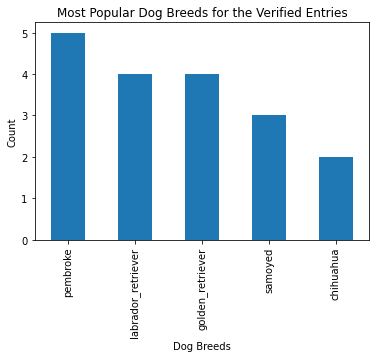

In [886]:
top_dogs.plot(kind="bar", title="test")
plt.title("Most Popular Dog Breeds for the Verified Entries")
plt.xlabel("Dog Breeds")
plt.ylabel("Count")

#### 3. Insight

of all the dog, which ones tend to be the most popular?

In [887]:
top_predicted_dogs = master.groupby(['p1']).size().sort_values(ascending=False)

In [888]:
top_predicted_dogs = top_predicted_dogs.head()

Text(0, 0.5, 'Frequency')

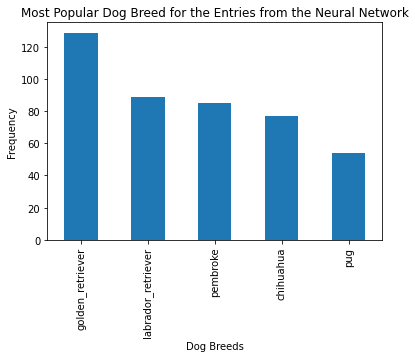

In [890]:
top_predicted_dogs.plot(kind="bar", title="test")
plt.title("Most Popular Dog Breed for the Entries from the Neural Network")
plt.xlabel("Dog Breeds")
plt.ylabel("Frequency")